<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [2]:
# Read Titanic Dataset
titanic_csv = 'C:\\Users\\wibby\\Data Science Labs\\Datasets\\titanic.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [3]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [4]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [5]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [47]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Fare Class       int64
Age Class        int64
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [7]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

In [9]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
# ANSWER
#Filled forward, as there are less than one quarter ages missing, and over 50% of teh ages are within 20 years of each other
titanic_agefill = titanic
titanic_agefill['Age'] = titanic_agefill.Age.fillna(method = 'ffill')
titanic_agefill.isnull().sum()
titanic_agefill.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Cabin

In [11]:
# ANSWER
#Cabin seems to be an irrelevant column, and there is over 3/4 of data missing, so removed column
titanic_removecabin = titanic.drop('Cabin', axis = 1, inplace = True)


### Embarked

In [12]:
# ANSWER
titanic['Embarked'].isnull().sum()


2

In [13]:
titanic_embdrop= titanic.dropna(subset=['Embarked'])
#Dropped whole row, as they were clearly not recorded and have no relationship to other passengers

In [14]:
titanic.dropna(subset=['Embarked'], inplace=True)

In [15]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Describe

Describe your dataset.

In [16]:
# ANSWER
print(titanic.describe())
print(titanic.shape)
print(titanic.dtypes)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.535624    0.524184   
std     256.998173    0.486260    0.834700   14.527483    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   20.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.000000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(889, 11)
PassengerId      int64
Survived         int64
Pclass           int64
Na

# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [17]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

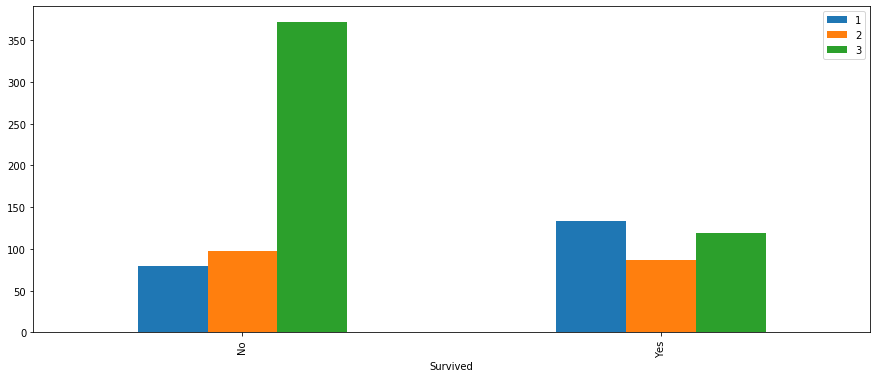

In [18]:
# ANSWER
bar_charts(titanic,'Pclass')
#Those who survived wereequally spread through the classes, however as there were many 
#more passengers in class 3, the death rate was far higher in that class.

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

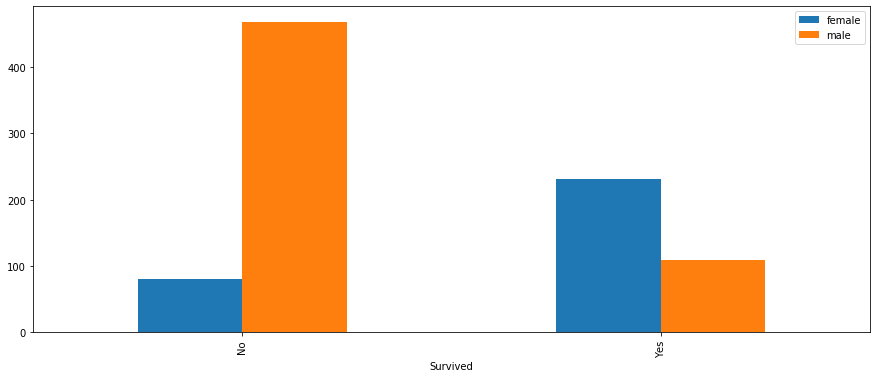

In [19]:
# ANSWER
bar_charts(titanic, 'Sex')
#Females had a higher chance of survival than men. The difference is enormous.

## Parch

Parch = Number of parents of children travelling with each passenger.

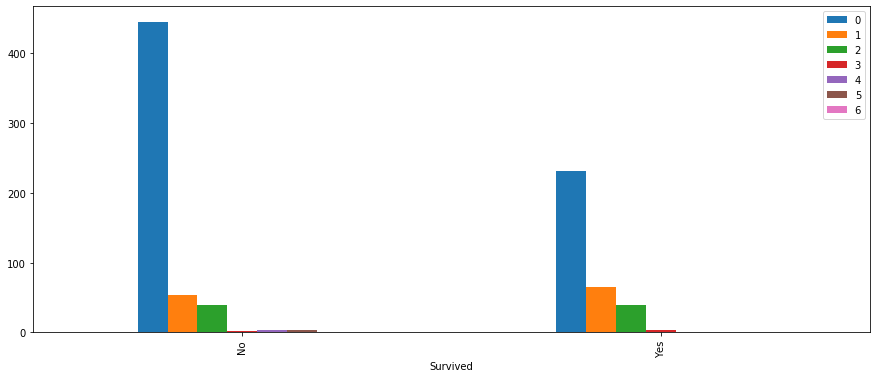

In [20]:
# ANSWER
bar_charts(titanic, 'Parch')
#Those with larger amounts of children/parents had a lower chance of survival than small families.
#There was a much lower chance of survival for those travelling without parents or children aboard.
#However, knowing women had a far higher chance of survival, we can assume the survival of parents with children was mothers.

## SibSp

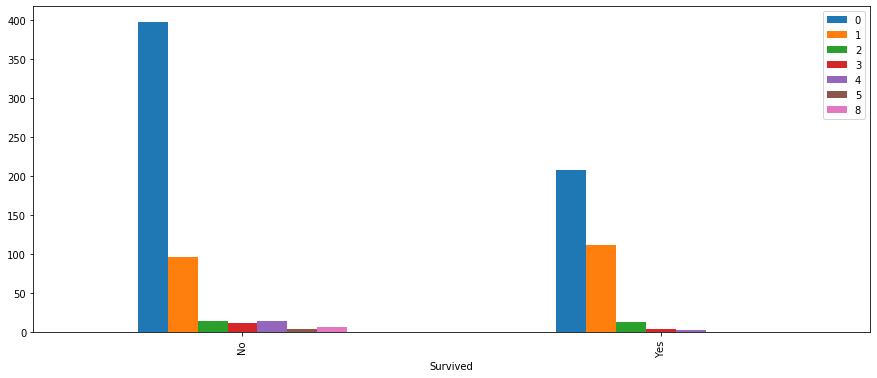

In [21]:
bar_charts(titanic, 'SibSp')
#The larger the family, the lower the chance of survival. Those travelling alone had a much higher survival chance.

## Embarked

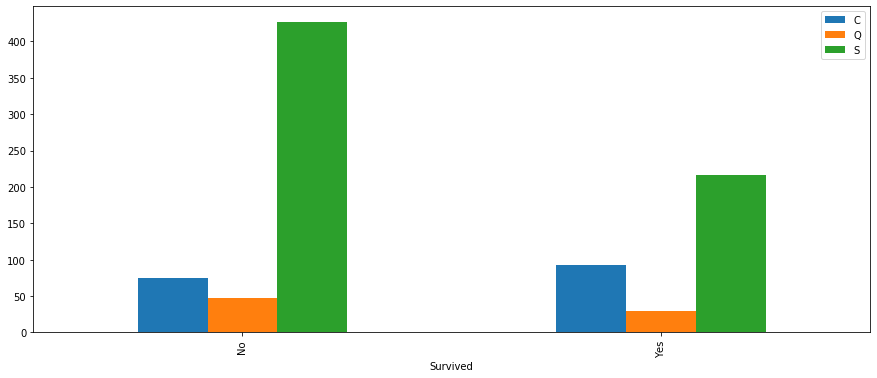

In [22]:
bar_charts(titanic, 'Embarked')
#Southampton passengers had the highest and lowest survival rates. In effect, the difference is insignificant.
#This most likely means there were far more passengers aboard from Southampton.

# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [25]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif (x > 20) & (x <= 30):
        fare_class = 2
    elif (x > 10) & (x <= 20):
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [29]:
# ANSWER
fare_class = []
for i in titanic.Fare:
    fare_class.append(create_fare_class(i))

titanic['Fare Class'] = fare_class

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,4


## Age Class

In [ ]:
# ANSWER

In [31]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [32]:
# ANSWER
age_class = []
for i in titanic.Age:
    age_class.append(create_age_class(i))
    
titanic['Age Class'] = age_class

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare Class,Age Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,4,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,4,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,4,3


# Staistical Overview

## Correlation

Find correlation between `survived` and other features.

In [33]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare Class,Age Class
PassengerId,1.000000,-0.005028,-0.035330,0.024020,-0.057686,-0.001657,0.012703,0.003273,0.021999
Survived,-0.005028,1.000000,-0.335549,-0.069907,-0.034040,0.083151,0.255290,-0.304860,-0.052364
Pclass,-0.035330,-0.335549,1.000000,-0.287864,0.081656,0.016824,-0.548193,0.718321,-0.261449
Age,0.024020,-0.069907,-0.287864,1.000000,-0.205270,-0.164226,0.080703,-0.072555,0.936901
SibSp,-0.057686,-0.034040,0.081656,-0.205270,1.000000,0.414542,0.160887,-0.383096,-0.203665
Parch,-0.001657,0.083151,0.016824,-0.164226,0.414542,1.000000,0.217532,-0.389516,-0.145354
Fare,0.012703,0.255290,-0.548193,0.080703,0.160887,0.217532,1.000000,-0.598045,0.072901
Fare Class,0.003273,-0.304860,0.718321,-0.072555,-0.383096,-0.389516,-0.598045,1.000000,-0.058102
Age Class,0.021999,-0.052364,-0.261449,0.936901,-0.203665,-0.145354,0.072901,-0.058102,1.000000


# [BONUS] Hypothesis Testing
---
Hypothesis testing is the use of statistics to determine the probability that a given hypothesis is true. The usual process of hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [34]:
# ANSWER
titanic_young = titanic[titanic.Age < 35]
titanic_young.head()
titanic_young.shape

(590, 13)

In [42]:
titanic_old = titanic[titanic.Age > 35]
titanic_old.head()
titanic_old.shape

(274, 13)

### Set alpha (Let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [36]:
# ANSWER
alpha = 0.05

### Calculate point estimate

In [ ]:
a = titanic_young['Survived']
b = titanic_old['Survived']

In [ ]:
## Calculate the variance to get the standard deviation
var_a = a.var()
var_b = b.var()

print(var_a,var_b)
## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)
print(s)

### Calculate test statistic

In [ ]:
## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/100))
t

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [ ]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*100 - 2
print(df)

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)
print(p)

In [ ]:
print("t = " + str(t))
print("p = " + str(2*p))

### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [ ]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [ ]:
print_sig(p, alpha)

In [ ]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



